In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import geopandas as gpd

files = sorted(glob.glob("*.nc"))
files

In [ ]:
#format is 'fn = '/mnt/c/Users/isabe/FILES/Documents/FHL Summer 2025/landsat .nc files/2022-09-29T19_01_47.715049000.nc''
fn = '/mnt/c/Users/isabe/FILES/Documents/FHL Summer 2025/landsat .nc files/2022-09-29T19_01_47.715049000.nc'
scn1 = "2021-06-30T19:01:19.764388000.nc"
scn2 = "2021-07-01T17:59:16.791493000.nc"
scn3 = "2021-07-01T17:59:40.670009000.nc"
scn4 = "2022-07-27T19:01:26.703735000.nc"
scn5 = "2022-08-12T17:32:24.353686000.nc"
scn6 = "2022-08-12T19:01:36.957727000.nc"
scn7 = "2022-09-29T19:01:47.715049000.nc"

In [30]:
ds1 = xr.open_dataset(fn)
ds2 = xr.open_dataset(scn3)

ds

In [31]:
ds2


<xarray.Dataset> Size: 122MB
Dimensions:      (y: 1974, x: 1675)
Coordinates:
  * y            (y) float64 16kB 5.42e+06 5.42e+06 ... 5.361e+06 5.361e+06
  * x            (x) float64 13kB 4.75e+05 4.751e+05 ... 5.252e+05 5.253e+05
    time         datetime64[ns] 8B ...
Data variables: (12/20)
    spatial_ref  int32 4B ...
    qa           (y, x) int16 7MB ...
    red          (y, x) uint16 7MB ...
    blue         (y, x) uint16 7MB ...
    drad         (y, x) int16 7MB ...
    emis         (y, x) int16 7MB ...
    ...           ...
    swir16       (y, x) uint16 7MB ...
    swir22       (y, x) uint16 7MB ...
    coastal      (y, x) uint16 7MB ...
    qa_pixel     (y, x) uint16 7MB ...
    qa_radsat    (y, x) uint16 7MB ...
    qa_aerosol   (y, x) uint8 3MB ...

In [28]:
ds2

<xarray.Dataset> Size: 122MB
Dimensions:        (y: 1974, x: 1675)
Coordinates:
  * y              (y) float64 16kB 5.42e+06 5.42e+06 ... 5.361e+06 5.361e+06
  * x              (x) float64 13kB 4.75e+05 4.751e+05 ... 5.252e+05 5.253e+05
    time           datetime64[ns] 8B ...
Data variables: (12/20)
    spatial_ref    int32 4B ...
    qa             (y, x) int16 7MB ...
    red            (y, x) uint16 7MB ...
    blue           (y, x) uint16 7MB ...
    drad           (y, x) int16 7MB ...
    emis           (y, x) int16 7MB ...
    ...             ...
    swir16         (y, x) uint16 7MB ...
    swir22         (y, x) uint16 7MB ...
    cloud_qa       (y, x) uint8 3MB ...
    qa_pixel       (y, x) uint16 7MB ...
    qa_radsat      (y, x) uint16 7MB ...
    atmos_opacity  (y, x) int16 7MB ...

(48.465113, -122.952554)

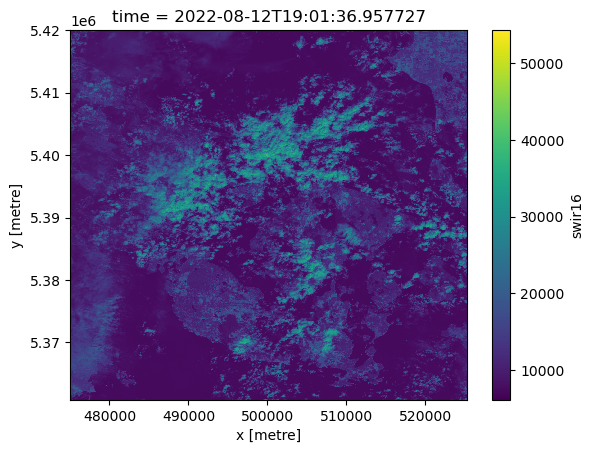

In [35]:
ds2['swir16'].plot()

#can plot any of variables listed above 
48.465113, -122.952554





In [ ]:
#this code converts from latlong
#got this point from google maps off of CP, had to convert from latlong (WGS84) (world geodetic system 1984) into UTM 10-N
#important to note: latlong is EPSG:4326, UTM is EPSG:32610
#UTM 10N is specifically western washington + a little more
from shapely.geometry import Point
#Point has functions like buffer, etc, which we used to make circle
#shapely is vector data
import geopandas as gpd 

# Define the lat/lon point
lat_lon_point = Point(-122.952554, 48.465113)

# Create a GeoDataFrame with the point and its original CRS (EPSG:4326)
gdf = gpd.GeoDataFrame(geometry=[lat_lon_point], crs="EPSG:4326")
#geopandas is able to convert btwn coords pretty easily, so made a GeoDataFrame for that reason only - csv with 1 item in it, essentially

# Reproject the GeoDataFrame to the target CRS (EPSG:32610)
gdf_reprojected = gdf.to_crs("EPSG:32610")
#coordinate reference system

# Extract the reprojected point
reprojected_point = gdf_reprojected.geometry[0]
print(reprojected_point)

POINT (503507.328175198 5367998.7916395)


In [ ]:
reprojected_point.x

503507.328175198

In [ ]:
#extracting data from a single point
#
ds.interp(x=reprojected_point.x, y=reprojected_point.y, method='nearest') #nearest vs linear = method used to get values at point from gridded data set

<xarray.Dataset> Size: 84B
Dimensions:              ()
Coordinates:
    time                 datetime64[ns] 8B ...
    x                    float64 8B 5.035e+05
    y                    float64 8B 5.368e+06
Data variables:
    spatial_ref          int32 4B ...
    nir08                float64 8B 7.117e+03
    red                  float64 8B 7.125e+03
    green                float64 8B 7.617e+03
    blue                 float64 8B 7.5e+03
    qa_pixel             float64 8B 2.195e+04
    lwir11               float64 8B 3.956e+04
    temperature_celsius  float64 8B 11.08

In [ ]:
ds

<xarray.Dataset> Size: 78MB
Dimensions:              (y: 2335, x: 1678)
Coordinates:
  * y                    (y) float64 19kB 5.42e+06 5.42e+06 ... 5.35e+06
  * x                    (x) float64 13kB 4.75e+05 4.75e+05 ... 5.253e+05
    time                 datetime64[ns] 8B ...
Data variables:
    spatial_ref          int32 4B ...
    nir08                (y, x) uint16 8MB ...
    red                  (y, x) uint16 8MB ...
    green                (y, x) uint16 8MB ...
    blue                 (y, x) uint16 8MB ...
    qa_pixel             (y, x) uint16 8MB ...
    lwir11               (y, x) uint16 8MB ...
    temperature_celsius  (y, x) float64 31MB ...

<Axes: title={'center': 'time = 2022-09-29T19:01:47.715049'}, xlabel='x [metre]', ylabel='y [metre]'>

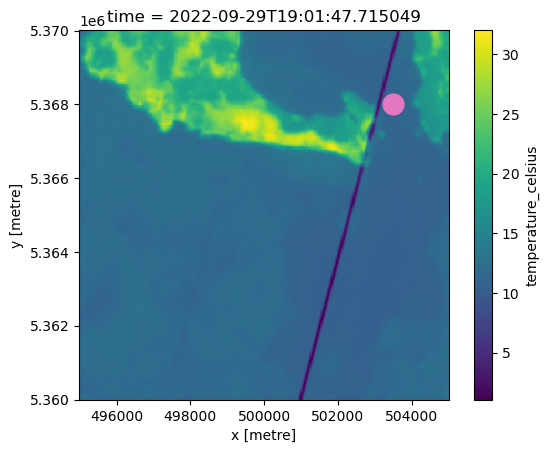

In [ ]:
#extracting data for an area
#using a buffer function 
#.buffer() makes a polygon
#again, using GeoDataFrame as a convenient way to do things - table w/ one item in it
gdf = gpd.GeoDataFrame(
    geometry=[reprojected_point.buffer(300)], 
    crs="EPSG:32610"
)


fig, ax = plt.subplots()
ds['temperature_celsius'].loc[5.37e6:5.36e6, 4.95e5:5.05e5].plot(ax = ax)
#plt.ylim(5.36e6, 5.37e6)

gdf.plot(ax = ax, color='tab:pink')
#using gdf to plot

In [ ]:
ds

<xarray.Dataset> Size: 78MB
Dimensions:              (y: 2335, x: 1678)
Coordinates:
  * y                    (y) float64 19kB 5.42e+06 5.42e+06 ... 5.35e+06
  * x                    (x) float64 13kB 4.75e+05 4.75e+05 ... 5.253e+05
    time                 datetime64[ns] 8B ...
    spatial_ref          int64 8B 0
Data variables:
    nir08                (y, x) uint16 8MB ...
    red                  (y, x) uint16 8MB ...
    green                (y, x) uint16 8MB ...
    blue                 (y, x) uint16 8MB ...
    qa_pixel             (y, x) uint16 8MB ...
    lwir11               (y, x) uint16 8MB ...
    temperature_celsius  (y, x) float64 31MB ...

In [ ]:
ds = ds.rio.write_crs('EPSG:32610')
#in order to use rio.clip, needed to make sure that ds had "i am in UTM coords" written in the right place
#so write_crs does that for us


In [ ]:
dsclipped = ds.rio.clip(gdf.geometry, all_touched=True)
#clipping all data to just the circle and getting what's inside
#getting rid of all_touched=True makes it default False

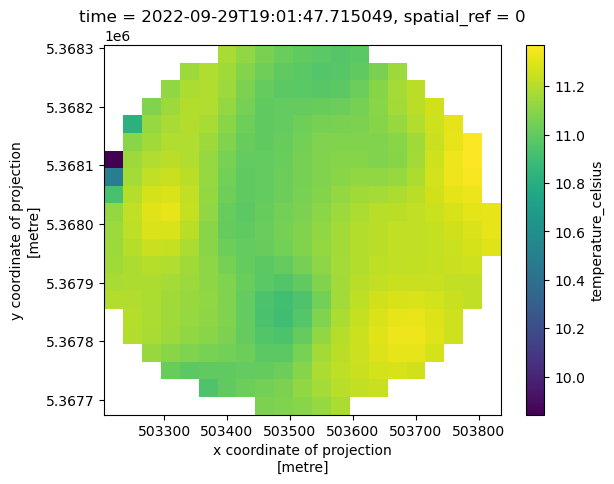

In [ ]:
dsclipped['temperature_celsius'].plot()
#plotting!

In [ ]:
#dsclipped.temperature_celsius.mean(dim=["x", "y"])
dsclipped.mean(dim=["x", "y"])

<xarray.Dataset> Size: 72B
Dimensions:              ()
Coordinates:
    time                 datetime64[ns] 8B ...
    spatial_ref          int64 8B 0
Data variables:
    nir08                float64 8B 5.672e+03
    red                  float64 8B 5.684e+03
    green                float64 8B 6.066e+03
    blue                 float64 8B 5.957e+03
    qa_pixel             float64 8B 1.747e+04
    lwir11               float64 8B 3.15e+04
    temperature_celsius  float64 8B 11.13

In [ ]:
dsclipped

<xarray.Dataset> Size: 960B
Dimensions:              (y: 7, x: 6)
Coordinates:
  * y                    (y) float64 56B 5.368e+06 5.368e+06 ... 5.368e+06
  * x                    (x) float64 48B 5.034e+05 5.035e+05 ... 5.036e+05
    time                 datetime64[ns] 8B ...
    spatial_ref          int64 8B 0
Data variables:
    nir08                (y, x) uint16 84B 0 7130 7138 7143 7135 ... 0 7134 0 0
    red                  (y, x) uint16 84B 0 7130 7149 7148 7139 ... 0 7143 0 0
    green                (y, x) uint16 84B 0 7648 7650 7632 7625 ... 0 7625 0 0
    blue                 (y, x) uint16 84B 0 7500 7513 7517 7510 ... 0 7494 0 0
    qa_pixel             (y, x) uint16 84B 1 21952 21952 21952 ... 1 21952 1 1
    lwir11               (y, x) uint16 84B 0 39541 39549 39556 ... 0 39539 0 0
    temperature_celsius  (y, x) float64 336B nan 11.0 11.03 ... 11.0 nan nan